# kdfoc3 activity height distribution

Assumptions:

zmax: max height of plume

zhat: height where triangular activity height distribution is at its max.
    This is  2/3 zmax for light paricles and 1/10 zmax for heavy particles

z0: ground

zmin: -3/10 zmax

$f(zmax) = 0$

$f(zmin) = 0$

A = $\int_{z0}^{zmax} f(z) dz$ = 1

In [89]:
from enum import Enum


class Particles(Enum):
    SMALL = 0
    LARGE = 1

class ActivityHeight():
    def __init__(self, zmax: int, part: Particles):
        self.zmax = zmax
        self.part = part
        # maximum of activity at zmax
        if part == Particles.SMALL:
            self.zhat = 2/3 * self.zmax
            self.fraction = 0.77
        else:
            self.zhat = 1/10 * self.zmax
            self.fraction = 0.23
        self.zmin = -3/10 * self.zmax
        self.fzhat = 2 * (self.zhat - self.zmin)/ ((self.zhat * self.zmax)- self.zmin * (self.zmax + self.zhat))


    def _activity_height_func(self, z: float):
        if z < self.zmin:
            return float(0)
        if z < self.zhat:
            return self.fzhat * (z - self.zmin) / (self.zhat - self.zmin)
        if z < self.zmax:
            return self.fzhat * (z - self.zmax) / (self.zhat - self.zmax)
        else:
            return float(0)

    def activity_height_func(self, z: np.array):
        return np.vectorize(self._activity_height_func)(z)

    def area_fraction(self, zb: float, zt: float):
        if zt <= self.zmin or zb >= self.zmax:
            return 0

        # AF1: area below zhat
        if zb >= self.zhat:
            AF1 = 0
        else:
            z1 = min(self.zhat, zt)
            AF1 = (z1 - zb) * (0.5 * (z1 + zb) - self.zmin) / (self.zhat - self.zmin)

        # AF2: area above zhat
        if zt <= self.zhat:
            AF2 = 0
        else:
            z2 = min(self.zmax, zt)
            z3 = max(self.zhat, zb)
            AF2 = (z2 - z3) * (0.5*(z2 + z3) - self.zmax)/(self.zhat - self.zmax)

        return self.fzhat* (AF1 + AF2)

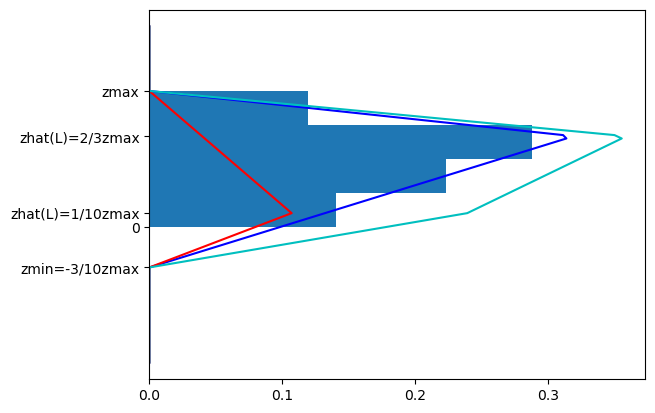

In [102]:
from matplotlib import pyplot as plt
import numpy as np

zmax = 4

ahS = ActivityHeight(zmax, Particles.SMALL)
ahL = ActivityHeight(zmax, Particles.LARGE)

z = np.arange(-4, zmax+2, 0.1)

zb = np.arange(0,zmax, 1)
area = [ahS.area_fraction(x, x+1)*ahS.fraction for x in zb]

fix, ax = plt.subplots()

ax.set_yticks([ahL.zmin, 0, ahL.zhat, ahS.zhat,  ahL.zmax])
ax.set_xticks(np.arange(-0.2,0.5,0.1))
ax.set_yticklabels(["zmin=-3/10zmax", "0", "zhat(L)=1/10zmax", "zhat(L)=2/3zmax", "zmax"])
ax.barh(zb+.5, area, [1 for x in zb])
ax.plot(ahS.activity_height_func(z)*ahS.fraction, z, 'b')
ax.plot(ahL.activity_height_func(z)*ahL.fraction, z, 'r')
ax.plot(ahS.activity_height_func(z)*ahS.fraction + ahL.activity_height_func(z)*ahL.fraction, z, 'c')
